## Pandas Practice

1. How many different companies are represented in the data set?
2. What is the total number of jobs created for businesses in Queens?
3. How many different unique email domains names are there in the data set?
4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [4]:
import pandas as pd

In [5]:
dat = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [6]:
dat.head(6)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,...,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan


In [7]:
dat.shape

(450, 26)

In [8]:
## How many different companies 
dat["Company Name"].nunique()

439

There 439 companies in the dataset

In [9]:
## What is the total number of jobs created for businesses in Queens?
dat[dat.Borough == "Queens"]["Job created"].sum()


102.0

102 jobs created 

In [10]:
### How many different unique email domains names are there in the data set?

# extract domain
dat['domain'] = dat['company email'].str.split('@').str[1]
#count unique
dat['domain'].nunique()

356

There are 365 unique domain names

In [11]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
dat2 = dat.groupby('NTA').filter(lambda x: len(x) >= 5)

In [15]:
data3 = dat2.groupby('NTA')['Total Savings'].mean().to_frame('avg saving')

In [20]:
data3

,avg saving,created job
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


In [19]:
data3['created job'] = dat2.groupby('NTA')['Job created'].sum()

In [21]:
data3.to_csv("NTA.csv")

### Matplotlib Practice

scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

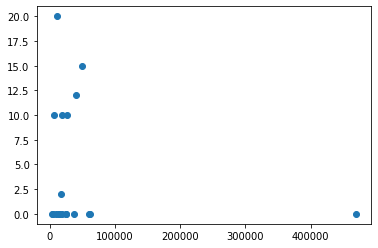

In [30]:
# standard
import matplotlib.pyplot as plt
plt.scatter(x = 'avg saving', y = 'created job', data = data3)

Text(0, 0.5, 'jobs created')

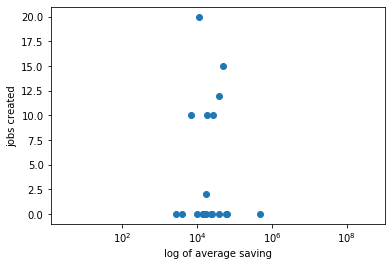

In [33]:
plt.xscale('log')
plt.scatter(x = 'avg saving', y = 'created job', data = data3)
plt.xlabel('log of average saving')
plt.ylabel('jobs created')

(array([17.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2760.88888889,  49473.87966667,  96186.87044444, 142899.86122222,
        189612.852     , 236325.84277778, 283038.83355556, 329751.82433333,
        376464.81511111, 423177.80588889, 469890.79666667]),
 <a list of 10 Patch objects>)

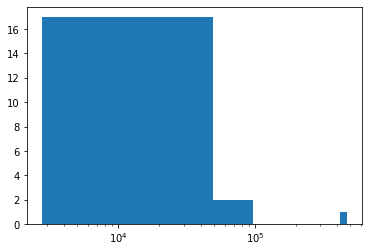

In [35]:
# histogram of the log of the average total savings
plt.xscale('log')
plt.hist(x = 'avg saving', data = data3)

In [38]:
# line plot of the total jobs created for each month
dat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [41]:
dat['Effective Date'] = pd.to_datetime(dat['Effective Date'])

In [44]:
dat['month'] = dat['Effective Date'].dt.month

In [63]:
dat4 = dat.groupby('month')['Job created'].sum().to_frame('sum')


In [64]:
dat4

,sum
month,
1,0.0
2,27.0
3,20.0
4,2.0
5,2.0
6,63.0
7,20.0
8,0.0
9,0.0


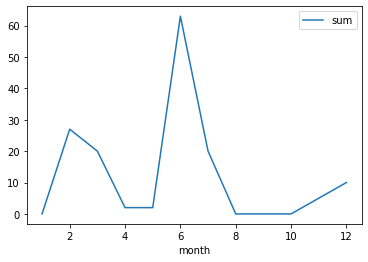

In [72]:
dat4.plot(y = 'sum', use_index = True)